In [1]:
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import math
import os.path as osp
#from matplotlib.collections import PatchCollection
from matplotlib import colors

## Episodes learning

The following function plots the relative duration of episodes

In [2]:
plt.style.use('fivethirtyeight')

def plot_episode(data_folder="data", save_episode=False, save_folder='runs', filename = 'episode.png'):
    """
        Plots episode duration vs episode number. 
        Pursuer learns in the episodes that are on the left with respect to the red dotted line.
        Evader learns (all together) in the episodes that are on the left with respect to the blue dotted line.
    """
    info = pd.read_csv(osp.join(data_folder,"env_info.csv"))
    num_birds=info['num_of_birds'].item()
    episode_lenght=info['episodes_length'].item()
    df = pd.read_csv(osp.join(data_folder,"episode.csv"))
    df["NormEndTime"] = df["EndTime"] / episode_lenght
    df["mean_norm_end"] = df["NormEndTime"] .rolling(100, min_periods=5).mean()
    #print(df)
    #pred_train = df["PredatorTraining"]
    #learner_change = np.where(np.roll(pred_train, -1) != pred_train)[0]
    ax = df.plot(x="Episode", y="mean_norm_end", kind="line", lw=0.5, legend=False, figsize=(16,9))
    ax.set_ylabel("EndTime")
    ax.set_ylim(0,1)
    #for i, x_l in enumerate(learner_change):
    #    if i%2 == 0:
    #        ax.axvline(x=x_l, color="red", linestyle='--', lw=1)
    #    else:
    #        ax.axvline(x=x_l, color="blue", linestyle='--', lw=1)
            
    if save_episode:
        fig = ax.get_figure()
        fig.savefig(osp.join(save_folder,filename))
    
    return ax
            
#def save_episode(path):
#    ax = plot_episode()
#    fig = ax.get_figure()
#    fig.savefig(join(path,'episode.png'))
    

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

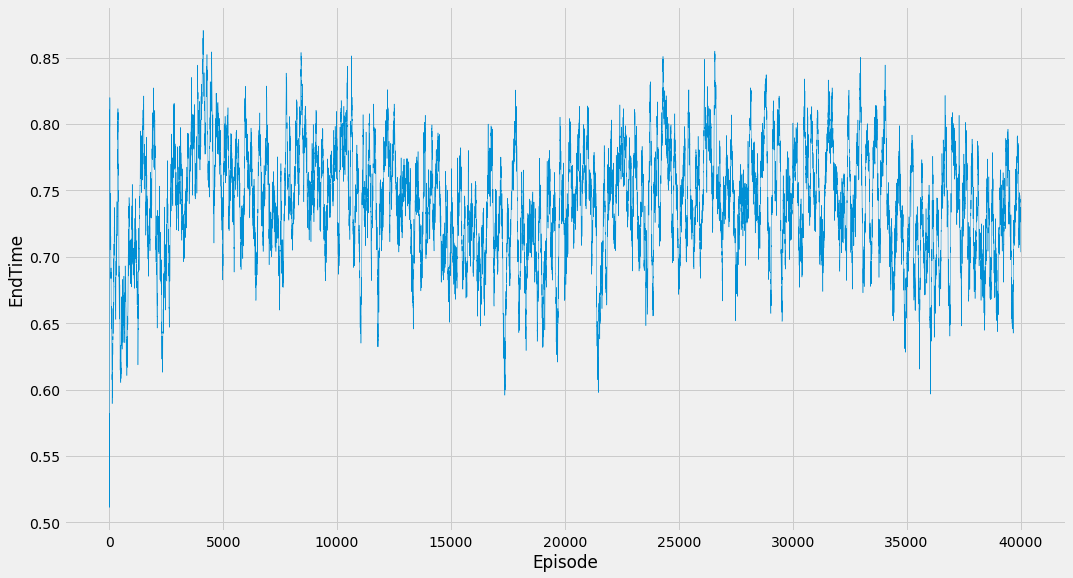

In [9]:
plot_episode(save_episode=True, save_folder='runs/neigh_impact', filename = 'episode_3_neigh.png')

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

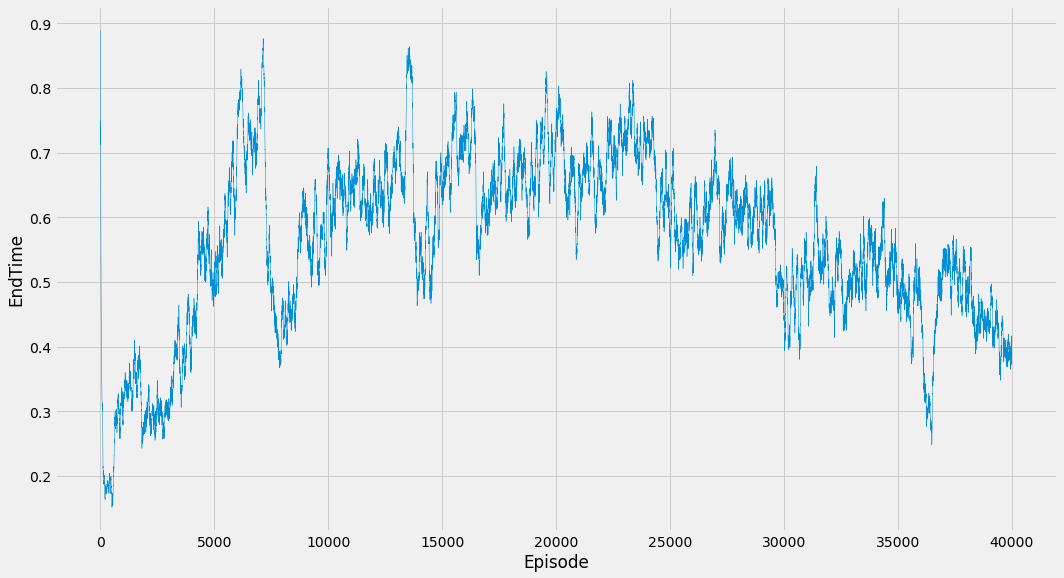

In [10]:
plot_episode(save_episode=True, save_folder='runs/neigh_impact', filename = 'episode_1_neigh.png')

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

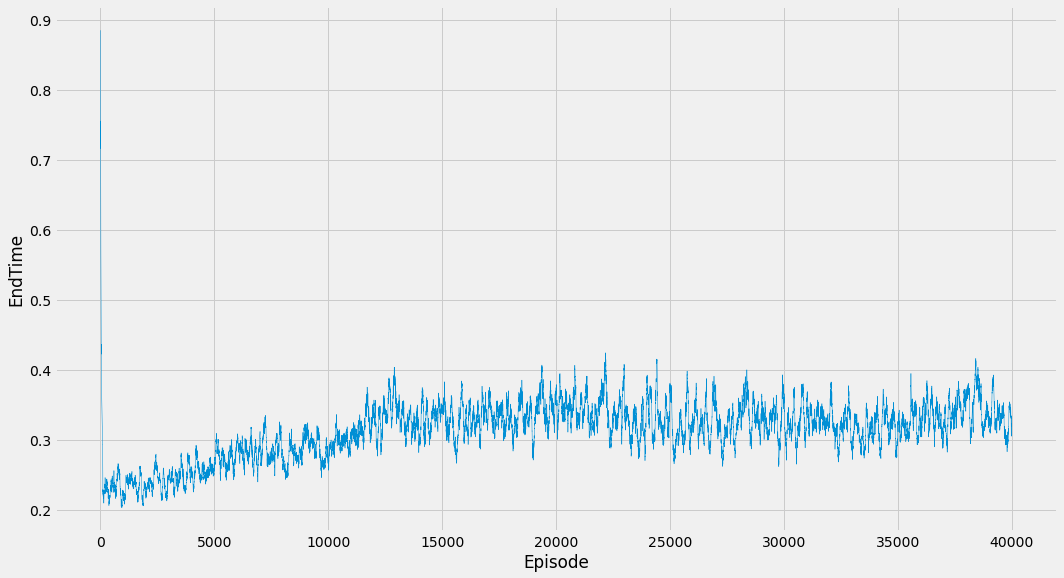

In [11]:
plot_episode(save_episode=True, save_folder='runs/neigh_impact_low_evader_vis', filename = 'episode_1_neigh.png')

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

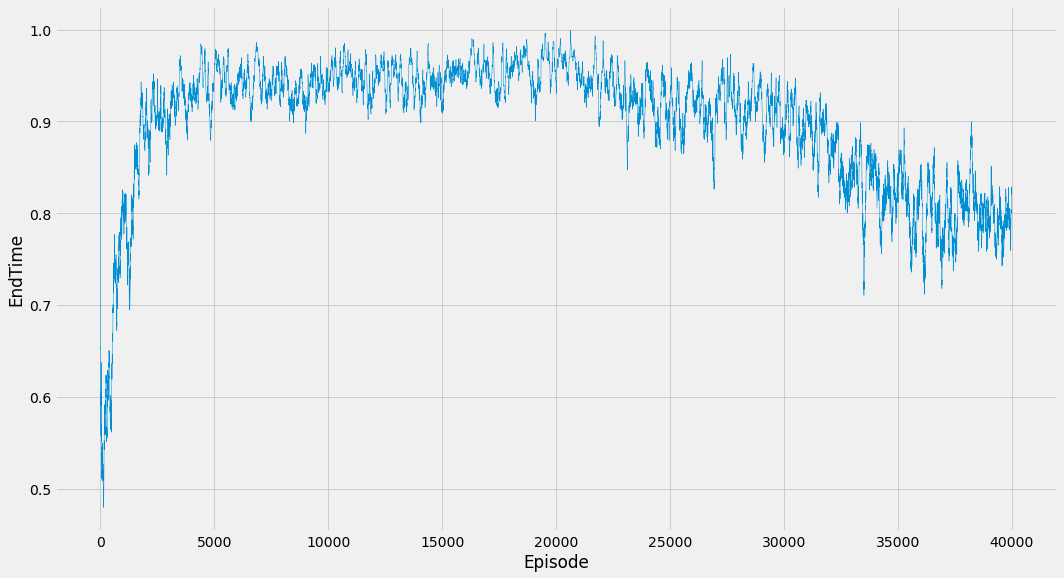

In [12]:
plot_episode(save_episode=True, save_folder='runs/neigh_impact_low_evader_vis', filename = 'episode_3_neigh.png')

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

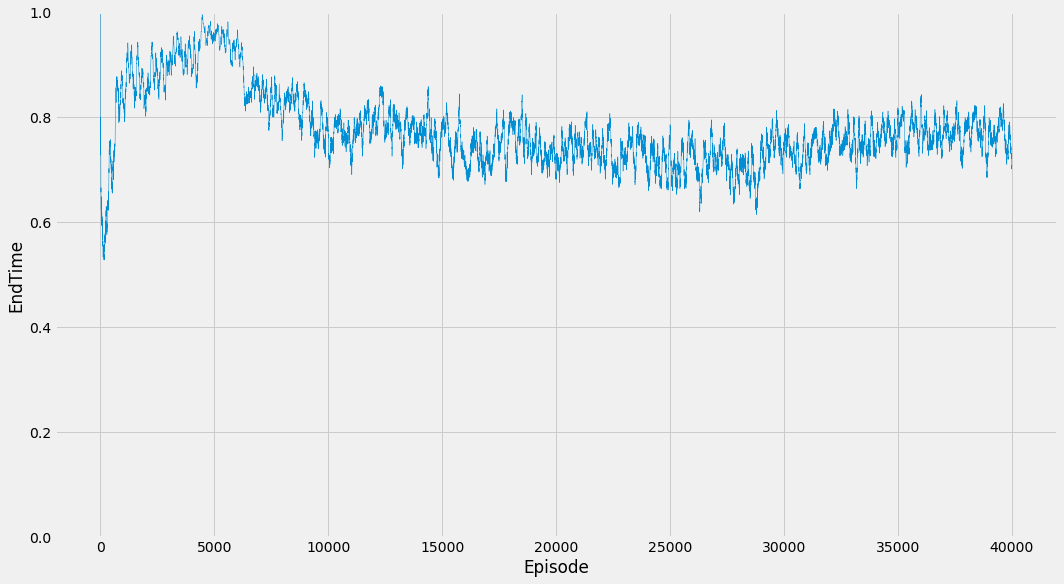

In [16]:
plot_episode()

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

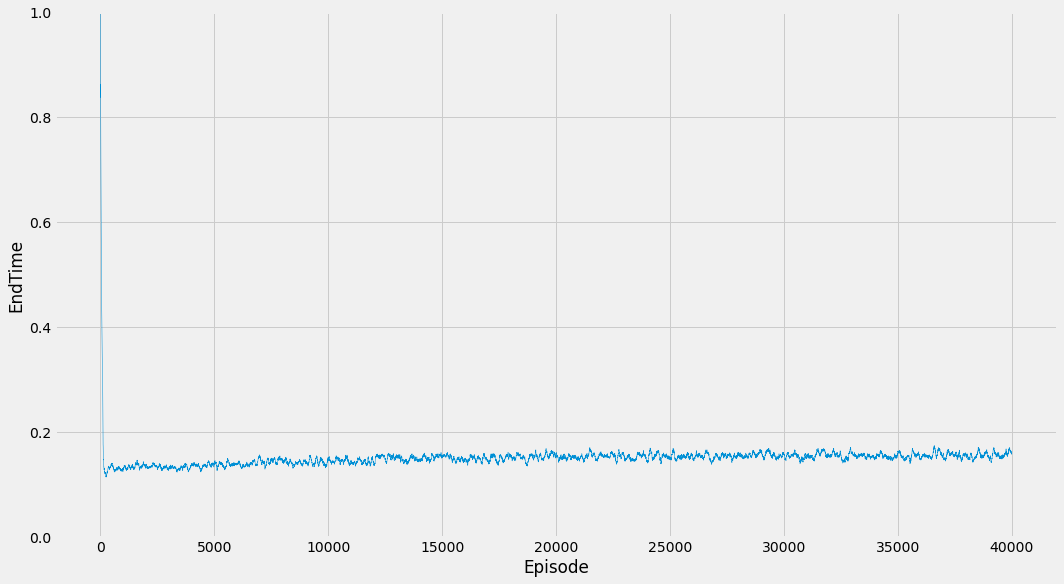

In [3]:
plot_episode()

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

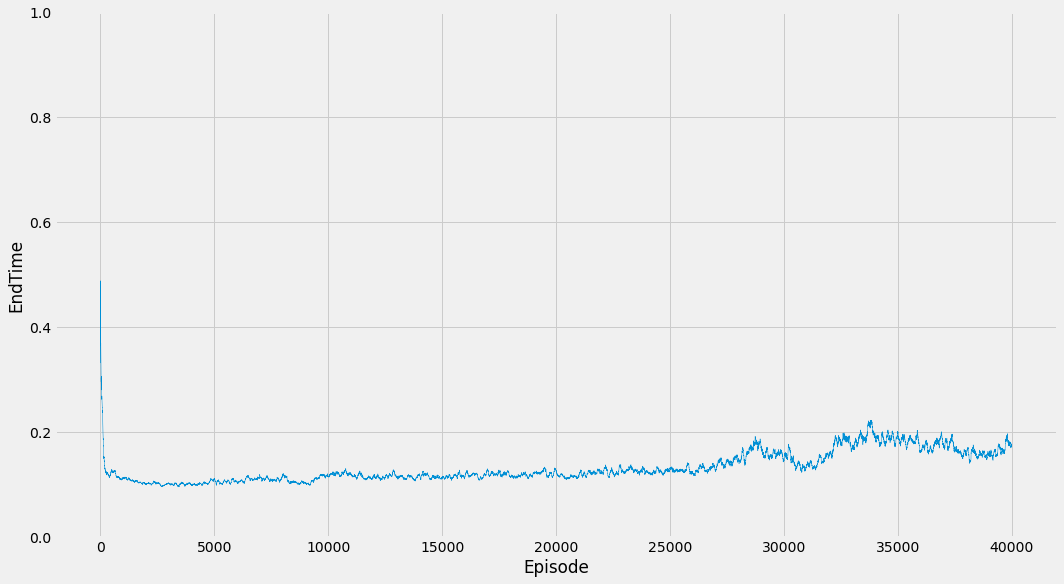

In [4]:
plot_episode()

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

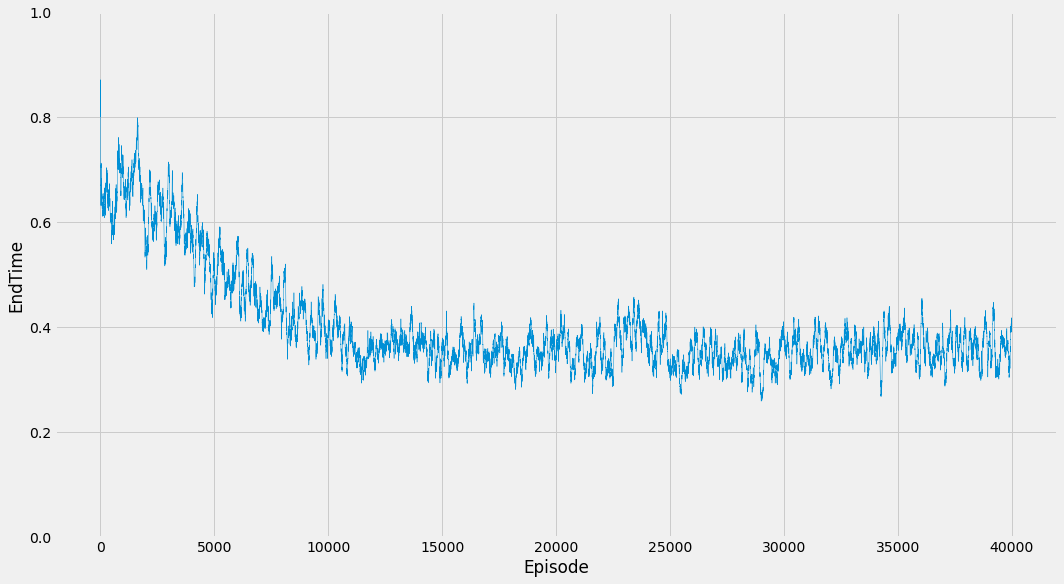

In [5]:
plot_episode()

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

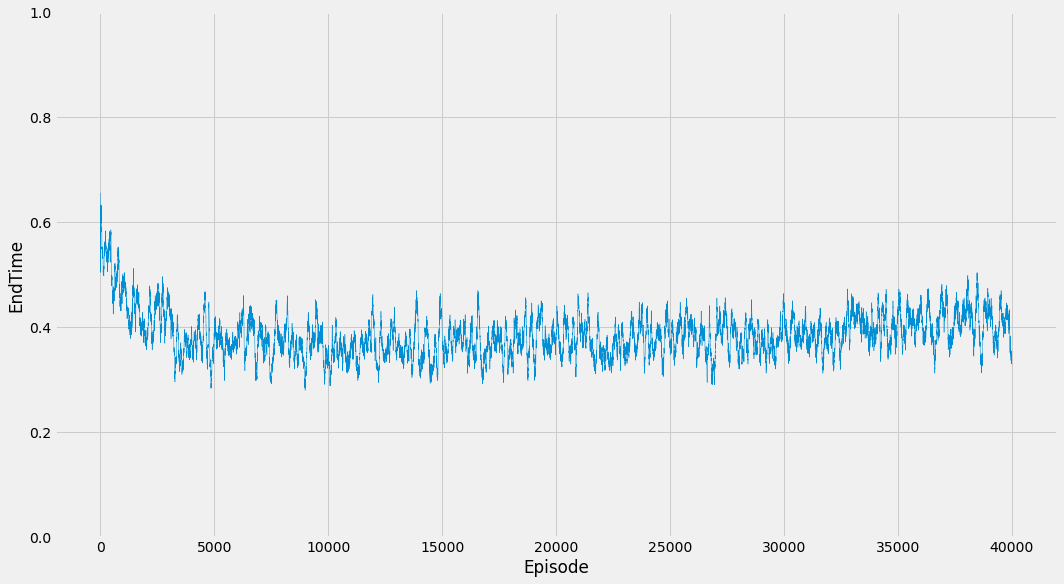

In [6]:
plot_episode()

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

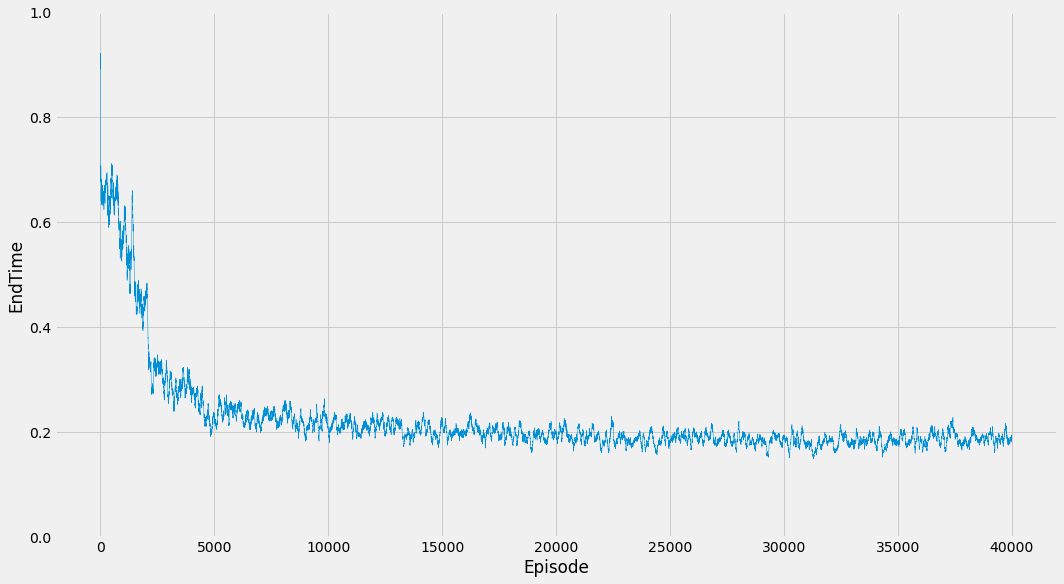

In [7]:
plot_episode()

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

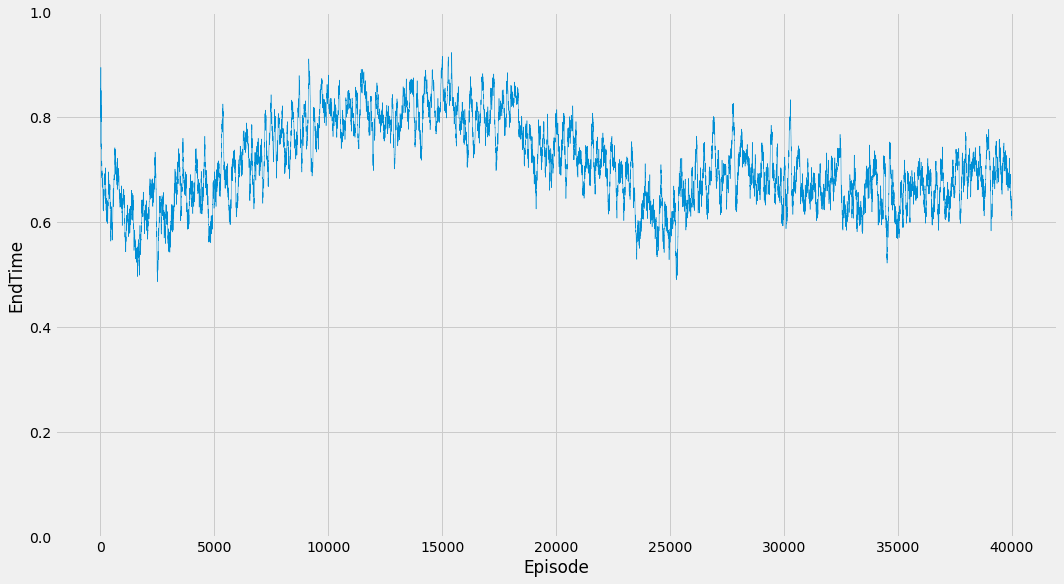

In [8]:
plot_episode()

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

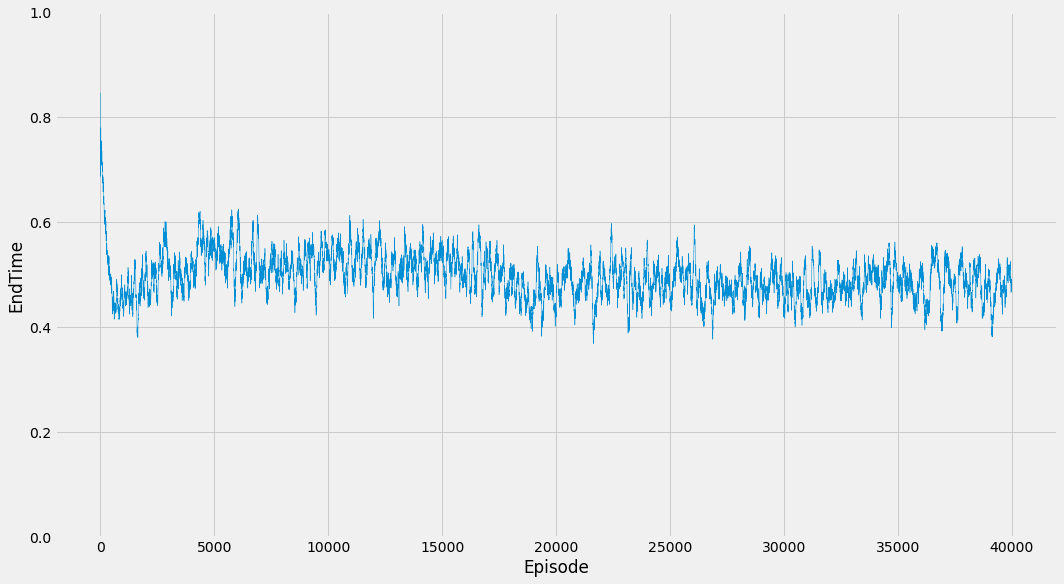

In [3]:
plot_episode()

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

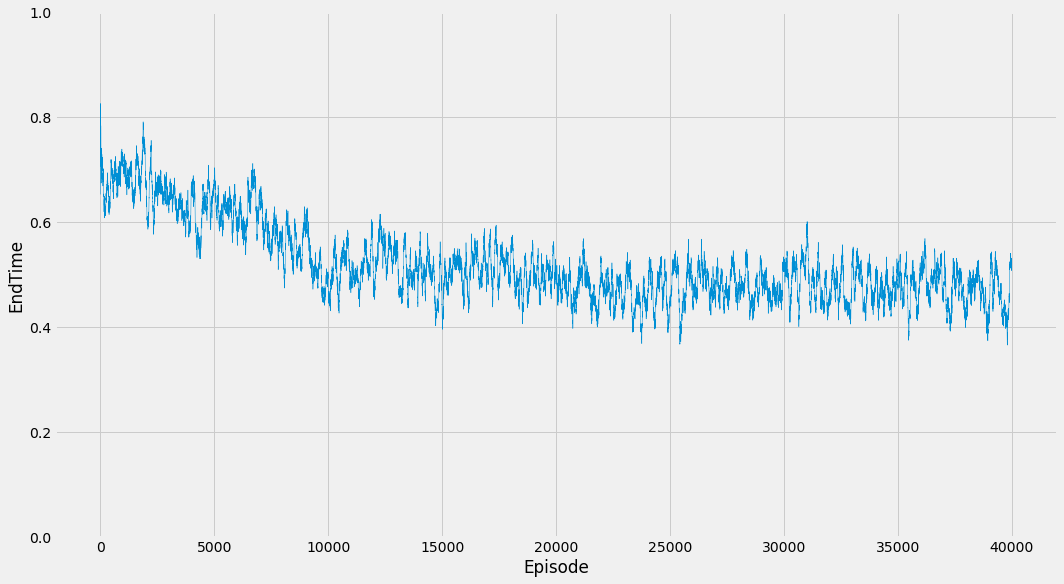

In [4]:
#3 neigh, e: {1.5,3}, p:{6,12}
plot_episode()

## Various plots

This function plots the first instant of each episode. It is just used to produce plots to exemplify the initial distribution of the birds

In [38]:
def plot_first_instant(ep):
    info = pd.read_csv("data/env_info.csv")
    birds_num = info['num_of_birds'][0]
    df = pd.read_csv('data/pursuer_trajectory.csv')
    df = df[df["Episode"] == ep]
    df.reset_index(drop=True, inplace=True)
    x = []
    y = []
    cols = []
    for i in range(0,birds_num):
        x.append(df["x"+str(i)][0])
        y.append(df["y"+str(i)][0])
        if i==0:
            cols.append("red")
        else:
            cols.append("blue")


    fig, ax = plt.subplots()
    ax.scatter(x,y, c=cols)
    fig.savefig("plots/first_instant_"+str(ep)+".jpg")

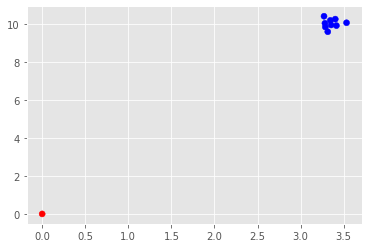

In [40]:
plot_first_instant(0)

### Plot $\phi$

In [6]:
import os
import pandas as pd
import math
folder = os.path.join('argo_data','data')

def plot_phi(folder='data'):
    df = pd.read_csv(os.path.join(folder,'pursuer_trajectory.csv'))
    df_info = pd.read_csv(os.path.join(folder,'env_info.csv'))
    birds_num = df_info['num_of_birds'].item()
    for i in range(birds_num):
        df['vx'+str(i)] = df['alpha'+str(i)].apply(lambda x: math.cos(x))
        df['vy'+str(i)] = df['alpha'+str(i)].apply(lambda x: math.sin(x))
    df['vx_av'] = df[['vx'+str(i) for i in range(birds_num)]].mean(axis=1)
    df['vy_av'] = df[['vy'+str(i) for i in range(birds_num)]].mean(axis=1)
    df['phi'] = df.apply(lambda x: math.sqrt(x['vx_av']*x['vx_av'] + x['vy_av']*x['vy_av']), axis=1)
    df[['Episode','phi']].groupby(by='Episode').mean().plot()

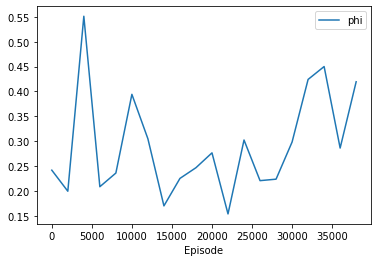

In [7]:
plot_phi()

## Distance measures

In [222]:
folder = 'data'
filename = 'pursuer_trajectory.csv'
df = pd.read_csv(os.path.join(folder,filename))

In [223]:
df_info = pd.read_csv(os.path.join(folder,'env_info.csv'))

In [224]:
num_of_birds = df_info['num_of_birds'].item()

In [225]:
df_pos_x = df[['x'+str(i) for i in range(num_of_birds)]]
df_pos_y = df[['y'+str(i) for i in range(num_of_birds)]]

In [226]:
df_pos = df_pos_x.join(df_pos_y)
df_pos['Episode'] = df['Episode']

In [227]:
import scipy.spatial.distance as dist

In [228]:
import itertools
x_cols = ['x'+str(i) for i in range(num_of_birds)]
y_cols = ['y'+str(i) for i in range(num_of_birds)]
new_cols = [x for x in itertools.chain.from_iterable(itertools.zip_longest(x_cols,y_cols))]

In [229]:
df_pos = df_pos[['Episode', *new_cols]]

In [230]:
episode_vals = df_pos['Episode'].unique()

In [247]:
ep_dist = np.empty(len(episode_vals))

for j,ep in enumerate(episode_vals):
    tmp = df_pos[df_pos['Episode'] == ep][new_cols].to_numpy().reshape(-1,num_of_birds,2)
    mean_dist = np.empty(len(tmp))
    for k,i in enumerate(tmp):
        mean_dist[k] = np.mean(dist.pdist(i[1:])) #We start from 1 thus excluding the predator
    ep_dist[j] = np.mean(mean_dist)

In [249]:
tmp = df_pos[df_pos['Episode'] == ep][new_cols].to_numpy().reshape(-1,num_of_birds,2)
l = tmp[0]

array([0.20598443, 0.12552354, 0.52368529, 0.60322705, 0.29032267,
       0.65159267, 0.6137811 , 0.03732987, 0.18405689, 0.33130625,
       0.31790295, 0.39734129, 0.08435795, 0.44562301, 0.40782271,
       0.24317897, 0.38791386, 0.64913796, 0.72863679, 0.41557015,
       0.77691381, 0.73912351, 0.08820499, 0.0621417 , 0.07971663,
       0.23393553, 0.12871245, 0.09092026, 0.56095645, 0.70566354,
       0.31320119, 0.04929754, 0.01288881, 0.64047699, 0.7848946 ,
       0.36134889, 0.32357324, 0.32748719, 0.47173589, 0.03786101,
       0.68880197, 0.83280054, 0.65099953, 0.79511239, 0.14704549])

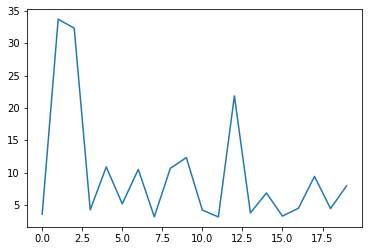

In [248]:
plt.plot(ep_dist)

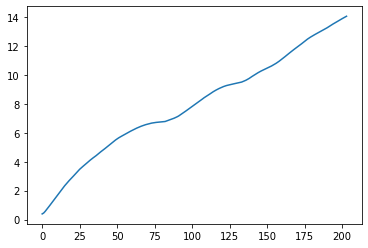

In [252]:
plt.plot(mean_dist)